# OT-2: Bearing Lifetime Analysis

In [1]:
import handcalcs.render

> Author: Elias Aoubala

> Date: 21/12/2025

## 1 - Background

This document contains the authors analysis on the evaluation of the bearing expected lifetimes - using the `SKF basic lifetime model`. The main purpose of this analysis is to quantify what the expected bearing lifetimes will be - and thus quantify if the bearings are likely to survive sustained operation above their operating limits.

## 2 - Introduction to the Model

The basic SKF Model takes into consideration the expected dynamic loads and lubrication applied onto the bearings, in-order to evaluate for the maximum expected number of rotations for the bearings at a given probability level of failure.

Based on this failure probability, we can then derive the expected operating hours of the system - considering a fixed rotational rate of the system.

$$L_{nm} = a_1 \cdot a_{SKF} \cdot \left(  \frac{C}{P} \right)^{p}

Where the parameters have the following meaning:

- $L_{nm}$: Rated Lifetime at x probability  [millions of revolutions]
- $a_{1}$: Life Adjustment Factor
- $a_{SKF}$: Life Modification Factor
- $C$: Basic Dynamic Load Rating [kN]
- $P$: Equivalent Dyanmic Bearing Load [kN]
- $p$: Exponent of life equation [3 for Ball Bearings, 10 for Roller Bearings]

The `Life Adjustment Factor ($a_1$)` is calculated based on the users desired reliability rating they wish to achieve for the bearing. A reference table is presented by SKF on the values of these parameters at varying reliability.

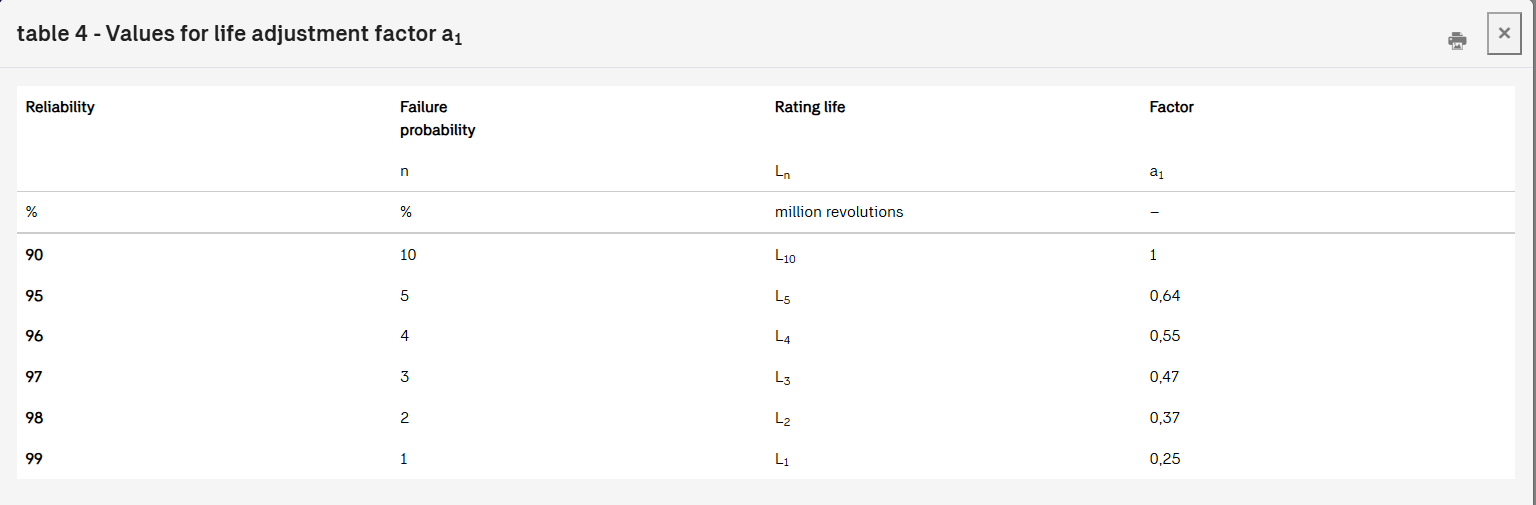

The `Life Modification Factor ($a_{SKF}$)` on the other hand is more challenging to derive - as this is dependent on the operation of the bearing, whether it is highly lubricated or otherwise. A reference image is presented below:

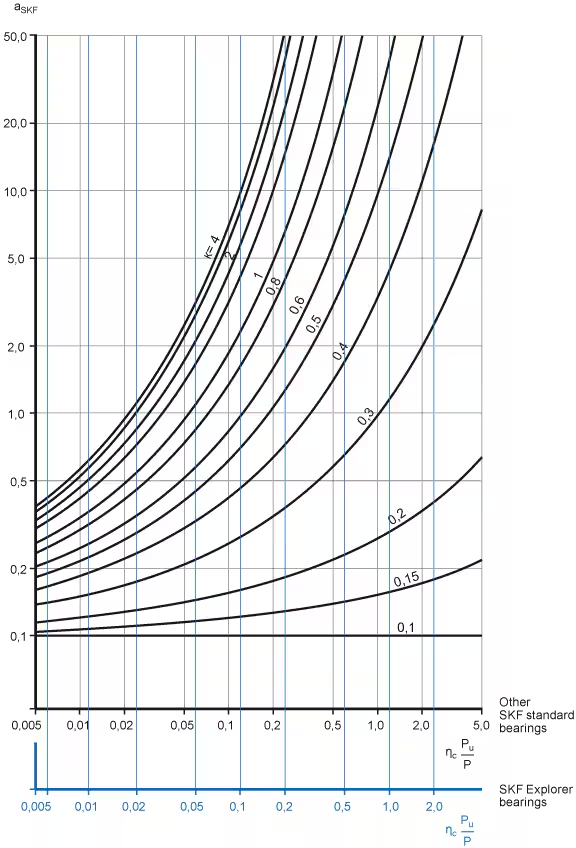

Inorder to use this graph - we need to determine the following two parameters:

**Viscosity Ratio**

$$k = \frac{v}{v_1}$$

Where:
- $v$: Viscosity of the Fluid Working
- $v_1$: Rated Viscosity of the Bearing at the selected operating lifetime.

The rated viscosity of the bearing is a parameter which is entirely dependent on the operating conditions and size of the bearing. SKF provide a chart to evaluate for this accordingly.

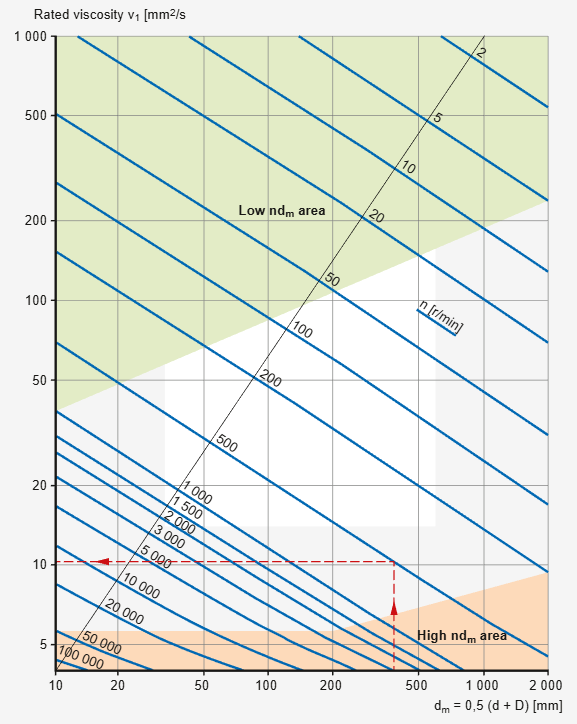

Finally, to use the above chart, we just need to get the fatigue load of the bearing - which in this case is a property of the bearing you select.

## 3 - Example Analysis: SKF7202

For last years turbopump, we had used the a pair of `SKF7202` ball bearings for the front bearing assembly. In this case, we shall keep things simple and assume the same bearing - to get an idea if the lifetimes are within reason for our selection.

### 3.1 - Combined Dynamic Load Analysis

#### 3.1.1 - Axial Thrust

For the determination of the axial thrust, we know that the bearings.

#### 3.1.2 - Radial Thrust

#### 3.1.3 - Total Combined Load

### 3.2 - Bearing Lifetime Adjustment Factor

For the Bearing Lifetime Adjustment Factor, we shall assume 99% reliability of the bearing inorder to maintain margin in this analysis.

In [3]:
%%render params

a_1 = 0.25

<IPython.core.display.Latex object>

### 3.3 - Life Modification Factor

For the life modification Factor - we will need to firstly solve for our viscosity factor of the bearing. To do this - lets firstly calculate the mean diameter of the bearing in-order to use the chart.

In [7]:
%%render sci_not 2

D_1 = 15e-3 # m
D_2 = 35e-3 # m

D_m = (D_1 + D_2) /2 # m

<IPython.core.display.Latex object>

Based on this - we can now evaluate for the bearing rated viscosity. From the chart, we can estimate this at approximately 3 mm^2/s.

In terms of the actual lubrican on the bearings - we know that our working fluid is IPA and given the bearings are wetted, all the lubricant is likely to be stripped. Hence, we will use the viscosity of our working fluid here instead.

Based on [this](https://www.univarsolutions.com/isopropanol-99-usp-3507100) study, we can see that the kinematic viscosity of IPA is 2.77 mm^2. Using these numbers, we can thus calculate the viscosity ratio.

In [18]:
%%render 

v_1 = 3 # mm \^ 2 / s
v = 2.77 # mm \^ 2 / s

k = v / v_1

<IPython.core.display.Latex object>

From this, we can now evaluate for the bearing lifetime modification factor - by comparing our dynamic loads to the ultimate fatigue load of the bearing. 

In this case, the [SKF 7202](https://www.skf.com/en/products/rolling-bearings/ball-bearings/angular-contact-ball-bearings/single-row-angular-contact-ball-bearings/productid-7202%20BEP) Datasheet lists the ultimate fatigue load at 0.1782 kN.

### 3.4 - Total Expected Bearing Lifetime